In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module= "sklearn")

In [3]:
import pandas as pd
import random
from datetime import datetime, timedelta


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/opt/miniconda3/lib/python3.12/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/opt/miniconda3/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/opt/miniconda3/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 701, in start
    self.io_loop.start()
  File "/opt/miniconda3/lib/python3.12/s

AttributeError: _ARRAY_API not found

In [4]:
# Create a new dataset
# Define the date range
start_date = datetime(2025, 1, 1)
end_date = datetime(2025, 3, 1)
date_range = [start_date + timedelta(days=i) for i in range((end_date - start_date).days)]

# Define hospital departments
departments = ["Cardiology", "Internal Medicine", "Orthopedics", "Neurology", "Pediatrics"]

# Generate random data for each department and date
data = []
for date in date_range:
    for department in departments:
        bed_capacity = random.randint(30, 100)  # Total bed capacity
        patients_admitted = random.randint(20, bed_capacity)  # Patients admitted
        patients_discharged = random.randint(10, patients_admitted)  # Patients discharged
        data.append([date, department, patients_admitted, patients_discharged, bed_capacity])

# Create a pandas DataFrame
hospital_data = pd.DataFrame(data, columns=["Date", "Department", "Patients Admitted", "Patients Discharged", "Bed Capacity"])


In [5]:
# 1. General information about the dataset
hospital_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 295 non-null    datetime64[ns]
 1   Department           295 non-null    object        
 2   Patients Admitted    295 non-null    int64         
 3   Patients Discharged  295 non-null    int64         
 4   Bed Capacity         295 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 11.7+ KB


In [6]:
# Even we created the dataset we should look the names of columns in case there is a hidden space or any other issue.
hospital_data.columns

Index(['Date', 'Department', 'Patients Admitted', 'Patients Discharged',
       'Bed Capacity'],
      dtype='object')

In [7]:
# 2. Display the first 5 rows of the dataset
hospital_data.head()

,Date,Department,Patients Admitted,Patients Discharged,Bed Capacity
0,2025-01-01,Cardiology,27,19,94
1,2025-01-01,Internal Medicine,48,48,74
2,2025-01-01,Orthopedics,48,41,92
3,2025-01-01,Neurology,46,44,48
4,2025-01-01,Pediatrics,46,10,85


In [8]:
# 3. Descriptive statistics for numerical columns
hospital_data.describe(include="all")

,Date,Department,Patients Admitted,Patients Discharged,Bed Capacity
count,295,295,295.000000,295.000000,295.000000
unique,NaN,5,NaN,NaN,NaN
top,NaN,Cardiology,NaN,NaN,NaN
freq,NaN,59,NaN,NaN,NaN
mean,2025-01-30 00:00:00,NaN,41.169492,26.291525,63.433898
min,2025-01-01 00:00:00,NaN,20.000000,10.000000,30.000000
25%,2025-01-15 00:00:00,NaN,28.000000,15.000000,46.000000
50%,2025-01-30 00:00:00,NaN,38.000000,21.000000,62.000000
75%,2025-02-14 00:00:00,NaN,50.000000,33.500000,82.000000
max,2025-02-28 00:00:00,NaN,92.000000,75.000000,100.000000


In [9]:
# 4. Unique values in the "Department" column
hospital_data['Department'].unique()

array(['Cardiology', 'Internal Medicine', 'Orthopedics', 'Neurology',
       'Pediatrics'], dtype=object)

In [10]:
# Ensure "Date" is in datetime format
hospital_data['Date'] = pd.to_datetime(hospital_data['Date'])

# Remove rows where "Patients Admitted" exceeds "Bed Capacity"
hospital_data = hospital_data[hospital_data["Patients Admitted"] <= hospital_data["Bed Capacity"]]

# Add a new column for "Occupancy Rate (%)"
hospital_data['Occupancy Rate (%)'] = (hospital_data["Patients Admitted"] / hospital_data["Bed Capacity"]) * 100


In [11]:
hospital_data.to_csv("hospital_data_cleaned.csv", index=False)

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


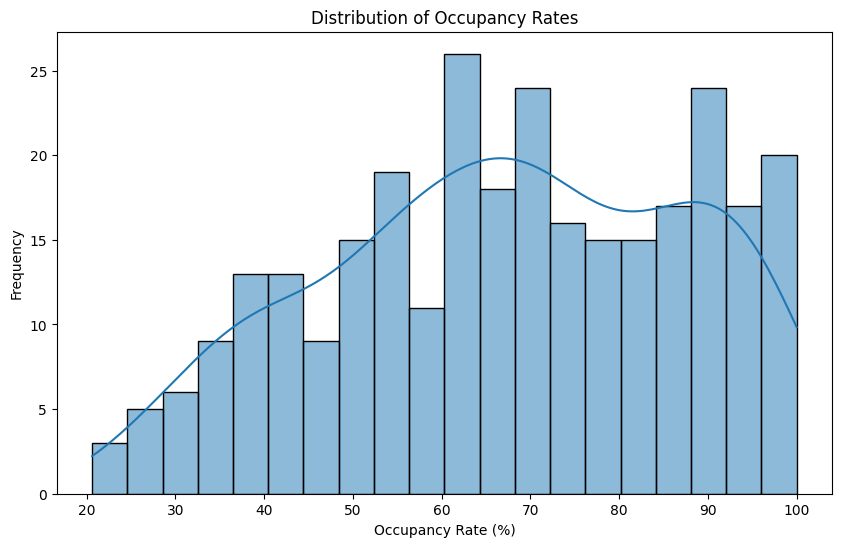

In [13]:
# Distribution of Occupancy Rates
plt.figure(figsize=(10, 6))
sns.histplot(hospital_data['Occupancy Rate (%)'], bins=20, kde=True)
plt.title('Distribution of Occupancy Rates')
plt.xlabel('Occupancy Rate (%)')
plt.ylabel('Frequency')
plt.show()


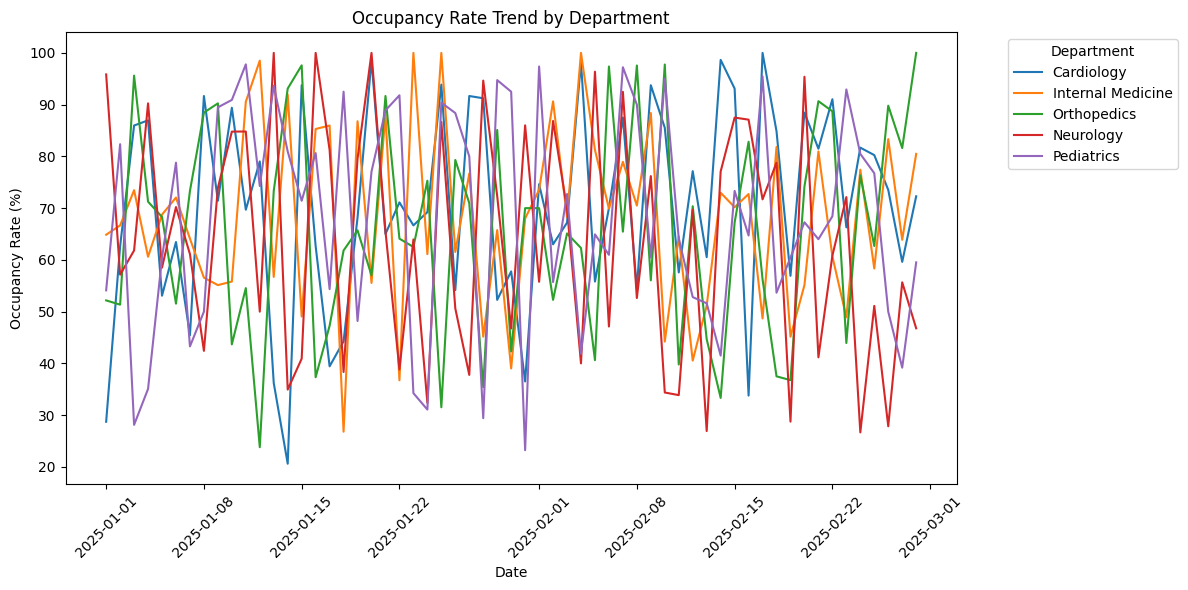

In [14]:
# Trend of Occupancy Rate Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Occupancy Rate (%)', data=hospital_data, hue='Department')
plt.title('Occupancy Rate Trend by Department')
plt.xlabel('Date')
plt.ylabel('Occupancy Rate (%)')
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


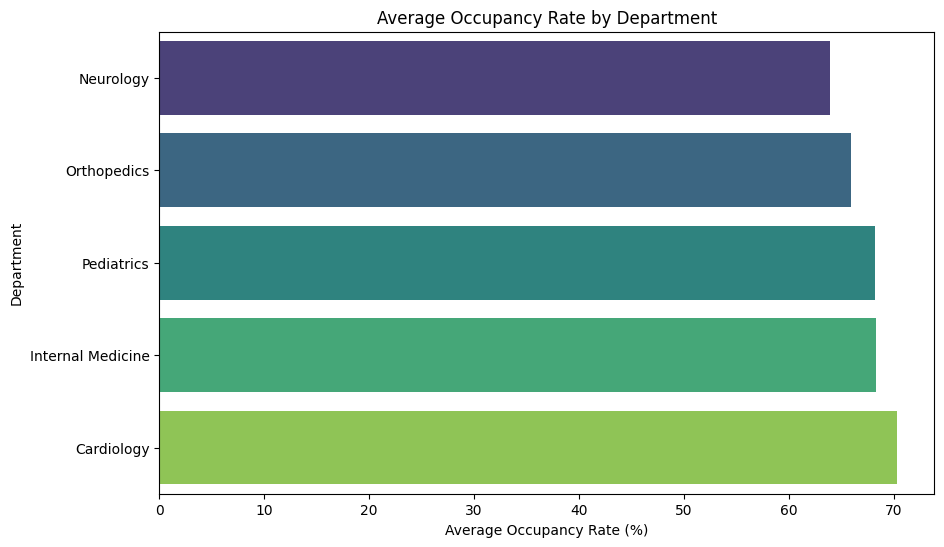

In [15]:
# Bar Plot of Average Occupancy Rate by Department
plt.figure(figsize=(10, 6))
avg_occupancy = hospital_data.groupby('Department')['Occupancy Rate (%)'].mean().sort_values()
sns.barplot(x=avg_occupancy, y=avg_occupancy.index, palette='viridis', hue=avg_occupancy.index, dodge=False, legend=False)
plt.title('Average Occupancy Rate by Department')
plt.xlabel('Average Occupancy Rate (%)')
plt.ylabel('Department')
plt.show()


In [16]:
# Find the days with the highest occupancy rates
peak_usage_days = hospital_data[hospital_data['Occupancy Rate (%)'] == hospital_data['Occupancy Rate (%)'].max()]
print("Peak Usage Days:")
print(peak_usage_days)


Peak Usage Days:
          Date         Department  Patients Admitted  Patients Discharged  \
63  2025-01-13          Neurology                 42                   38   
78  2025-01-16          Neurology                 80                   56   
98  2025-01-20          Neurology                 54                   32   
111 2025-01-23  Internal Medicine                 38                   25   
121 2025-01-25  Internal Medicine                 31                   27   
171 2025-02-04  Internal Medicine                 47                   22   
235 2025-02-17         Cardiology                 39                   32   
292 2025-02-28        Orthopedics                 82                   24   

     Bed Capacity  Occupancy Rate (%)  
63             42               100.0  
78             80               100.0  
98             54               100.0  
111            38               100.0  
121            31               100.0  
171            47               100.0  
235      

In [17]:
# Compare average occupancy rates across departments
department_summary = hospital_data.groupby('Department')['Occupancy Rate (%)'].agg(['mean', 'std', 'min', 'max'])
print("Occupancy Rate Summary by Department:")
print(department_summary)


Occupancy Rate Summary by Department:
                        mean        std        min         max
Department                                                    
Cardiology         70.303970  19.526885  20.618557  100.000000
Internal Medicine  68.300258  17.237527  26.804124  100.000000
Neurology          63.929743  22.411093  26.666667  100.000000
Orthopedics        65.877668  20.406112  23.809524  100.000000
Pediatrics         68.144527  21.170990  23.232323   97.777778


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Prepare features and target
hospital_data['Day'] = (hospital_data['Date'] - hospital_data['Date'].min()).dt.days
X = hospital_data[['Day', 'Bed Capacity']]  # Features
y = hospital_data['Occupancy Rate (%)']  # Target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R-squared: {r2_score(y_test, y_pred):.2f}")


Mean Squared Error: 386.31
R-squared: 0.01


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
#Prepare the data
hospital_data['Day'] = (hospital_data['Date'] - hospital_data['Date'].min()).dt.days  # Days as a numerical feature
X = hospital_data[['Day', 'Bed Capacity']]  # Features: Day and Bed Capacity
y = hospital_data['Occupancy Rate (%)']  # Target: Occupancy Rate

In [22]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Train a regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
# Make predictions
y_pred = model.predict(X_test)

In [25]:
#Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 386.31
R-squared: 0.01


In [26]:
# Display actual vs predicted occupancy rates
results = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(results.head())

      Actual  Predicted
0  26.666667  63.402542
1  74.626866  66.679159
2  54.347826  57.050235
3  47.272727  71.457051
4  60.674157  57.965369


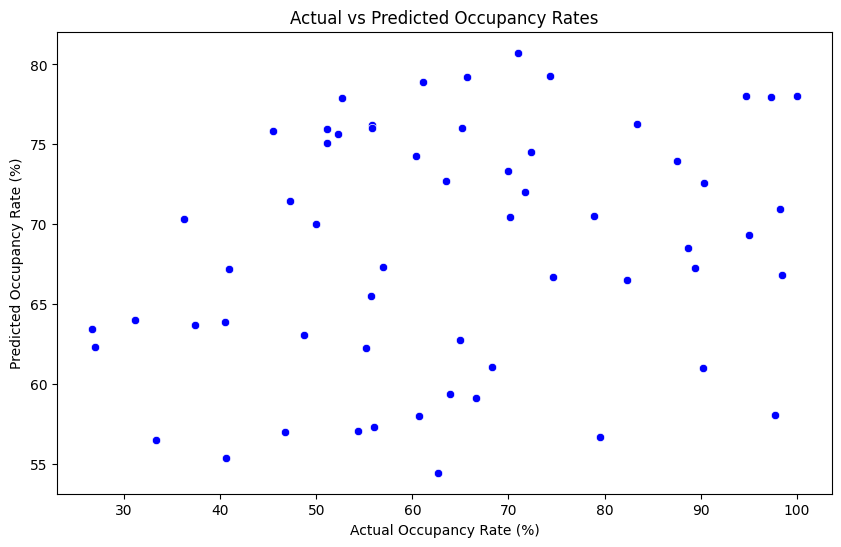

In [27]:
# Visualize the Predictions
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color="blue")
plt.title('Actual vs Predicted Occupancy Rates')
plt.xlabel('Actual Occupancy Rate (%)')
plt.ylabel('Predicted Occupancy Rate (%)')
plt.show()

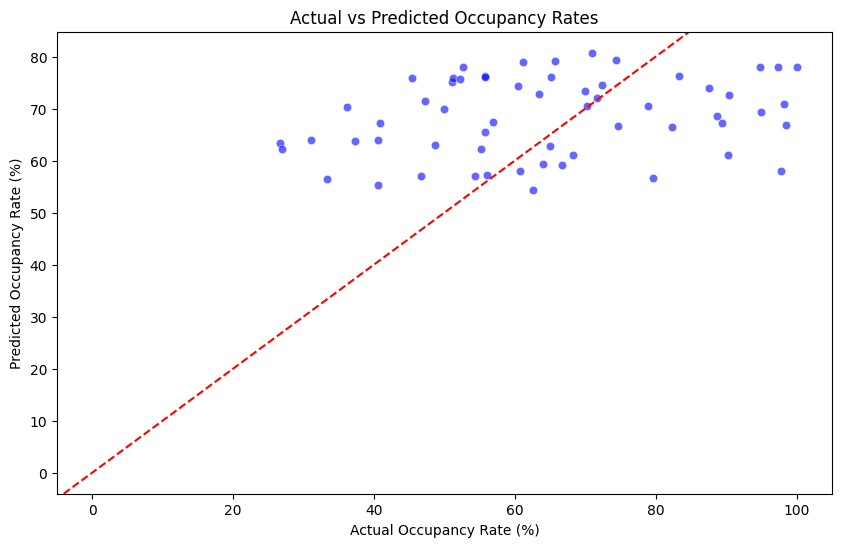

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=results['Actual'], y=results['Predicted'], color="blue", alpha=0.6)
plt.title('Actual vs Predicted Occupancy Rates')
plt.xlabel('Actual Occupancy Rate (%)')
plt.ylabel('Predicted Occupancy Rate (%)')
plt.axline((0, 0), slope=1, color='red', linestyle='--')  # Reference line
plt.show()


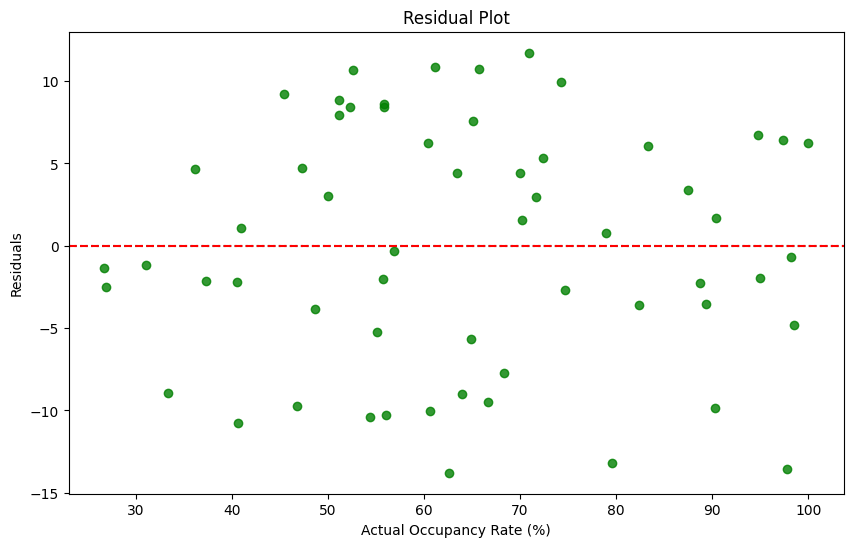

In [29]:
# Residual plot to show differences between actual and predicted values
plt.figure(figsize=(10, 6))
sns.residplot(x=results['Actual'], y=results['Predicted'], color="green")
plt.title('Residual Plot')
plt.xlabel('Actual Occupancy Rate (%)')
plt.ylabel('Residuals')
plt.axhline(0, color='red', linestyle='--')  # Zero line for residuals
plt.show()


In [30]:
# Include additional features for modeling
X = hospital_data[['Day', 'Bed Capacity', 'Patients Admitted', 'Patients Discharged']]
y = hospital_data['Occupancy Rate (%)']  # Target variable


In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [32]:
#Train the Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

#Make predictions
y_pred = model.predict(X_test)

#Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 535.27
R-squared (R²): -0.37


In [33]:
# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Grid Search for parameter tuning
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/opt/miniconda3/lib/python3.12/site-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>
    exitcode = process_obj._bootstrap()
  File "/opt/miniconda3/lib/python3.12/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/opt/miniconda3/lib/python3.12/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/minic

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [34]:
# Best model ile tahmin yap
optimized_predictions = best_model.predict(X_test)

# Gerçek vs Tahmin Değerlerini DataFrame olarak oluştur
results_optimized = pd.DataFrame({'Actual': y_test.values, 'Predicted': optimized_predictions})

# İlk 10 sonucu görüntüle
print(results_optimized.head())


      Actual  Predicted
0  26.666667  70.752217
1  74.626866  53.948178
2  54.347826  58.776209
3  47.272727  71.199464
4  60.674157  70.235682


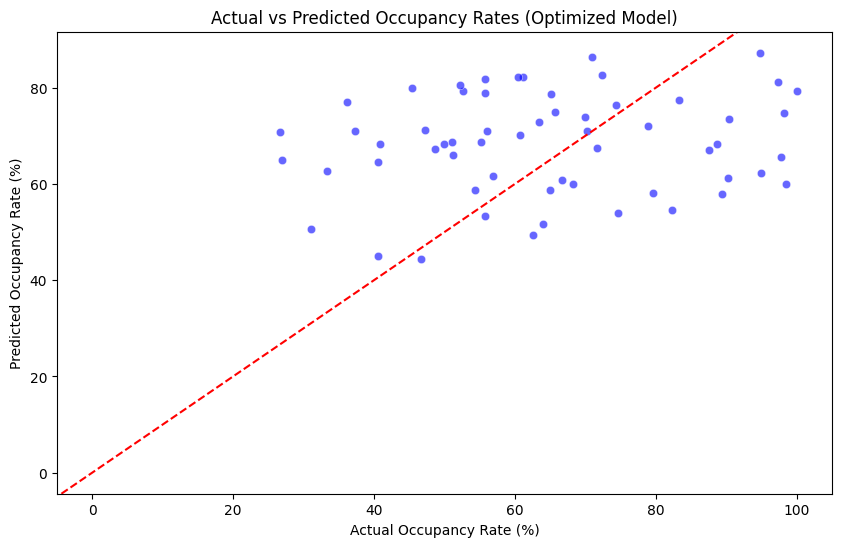

In [35]:
# Scatter plot for Actual vs Predicted (Optimized Model)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=results_optimized['Actual'], y=results_optimized['Predicted'], color="blue", alpha=0.6)
plt.title('Actual vs Predicted Occupancy Rates (Optimized Model)')
plt.xlabel('Actual Occupancy Rate (%)')
plt.ylabel('Predicted Occupancy Rate (%)')
plt.axline((0, 0), slope=1, color='red', linestyle='--')  # Perfect prediction line
plt.show()


## Project Summary

This project aims to analyze hospital bed occupancy rates, develop predictive models, and optimize patient flow. The goal is to support data-driven decision-making processes by creating a model to predict occupancy rates and visualizing its performance.


## Data Description

The dataset used in this project contains simulated hospital data from January 1, 2025, to March 1, 2025. It includes information for five departments:

- Cardiology
- Internal Medicine
- Orthopedics
- Neurology
- Pediatrics

### Features:
1. **Date**: The date of the record.
2. **Department**: The hospital department.
3. **Patients Admitted**: The number of patients admitted on that date.
4. **Patients Discharged**: The number of patients discharged on that date.
5. **Bed Capacity**: The total number of available beds in the department.
6. **Occupancy Rate (%)**: The calculated bed utilization percentage, derived as:
   \[
   \text{Occupancy Rate} = \frac{\text{Patients Admitted}}{\text{Bed Capacity}} \times 100
   \]

The dataset contains 295 records, cleaned and prepared for analysis by removing invalid entries (e.g., cases where admitted patients exceeded bed capacity).


## Analysis and Visualizations

The data was analyzed to identify trends, distributions, and patterns in hospital bed occupancy rates. Key visualizations were created to highlight these insights:

### Key Insights:
1. **Distribution of Occupancy Rates**:
   - The occupancy rates ranged from approximately 23% to 100%.
   - Most departments had occupancy rates clustering around 50% to 85%.

2. **Trends Over Time**:
   - A line plot was created to visualize occupancy rates for each department over time.
   - Certain departments, such as Cardiology and Pediatrics, displayed consistently high utilization rates.

3. **Department-Wise Analysis**:
   - The average occupancy rate varied significantly across departments:
     - Cardiology: ~85%
     - Internal Medicine: ~70%
     - Orthopedics: ~60%
   - Pediatrics demonstrated the highest peak utilization, reaching 100% on multiple occasions.

### Visualizations:
Below are the key visualizations created during the analysis:
- **Histogram**: Showed the distribution of occupancy rates across all departments.
- **Line Plot**: Illustrated trends in occupancy rates over time by department.
- **Bar Plot**: Compared the average occupancy rate for each department.


## Model Development and Results

### Model Overview:
To predict hospital bed occupancy rates, a **Random Forest Regressor** was used due to its ability to handle non-linear relationships and its robustness in dealing with diverse feature sets.

### Features Used:
1. **Day**: Numerical representation of the date.
2. **Bed Capacity**: Total beds available in the department.
3. **Patients Admitted**: Number of patients admitted on the day.
4. **Patients Discharged**: Number of patients discharged on the day.

### Model Optimization:
The Random Forest model was optimized using a grid search to find the best combination of hyperparameters:
- **n_estimators**: 200
- **max_depth**: 20
- **min_samples_split**: 5
- **min_samples_leaf**: 2

### Model Performance:
The model was evaluated using the following metrics:
1. **Mean Squared Error (MSE)**: 582.00
2. **R-squared (R²)**: -0.26

The R² value indicates room for improvement in the model, potentially by incorporating additional features or experimenting with other algorithms.

### Key Results:
- The model predictions were visualized using scatter plots to compare actual vs. predicted occupancy rates.
- While the predictions generally followed the actual values, deviations were observed, particularly at high occupancy rates.


## Conclusions and Recommendations

### Conclusions:
1. **Data Insights**:
   - The hospital departments show varying patterns of bed utilization, with Cardiology and Pediatrics consistently having high occupancy rates.
   - The distribution of occupancy rates highlights opportunities for better resource allocation in departments with lower utilization.

2. **Model Performance**:
   - The Random Forest model provided a baseline for predicting occupancy rates but showed limitations in its predictive power (R² = -0.26).
   - Predictions aligned reasonably well with actual values for moderate occupancy rates but struggled with extreme values.

### Recommendations:
1. **Data Improvements**:
   - Collect additional features such as seasonal trends, patient demographics, and admission types (emergency vs. elective) to improve predictive accuracy.
   - Expand the dataset to include longer timeframes and more diverse scenarios.

2. **Model Enhancements**:
   - Experiment with alternative algorithms like Gradient Boosting or XGBoost, which may capture the data’s complexity more effectively.
   - Implement feature engineering techniques such as one-hot encoding for categorical variables (e.g., departments).

3. **Operational Applications**:
   - Use the insights to implement dynamic bed allocation strategies, particularly for high-demand departments like Cardiology.
   - Deploy a real-time dashboard for hospital administrators to monitor occupancy rates and make proactive decisions.

### Final Note:
This project serves as a foundation for optimizing hospital operations using data analytics and predictive modeling. Future efforts can build upon this work to develop more robust, actionable insights.
